In [21]:
import aiohttp

async def get_http(url):
    async with aiohttp.ClientSession() as ua:
        async with ua.get(url) as res:
            res.raise_for_status()
            return await res.read()

In [22]:
url = 'https://pbs.twimg.com/media/DN4bf7SXUAE_JFI.jpg'
buf = await get_http(url)

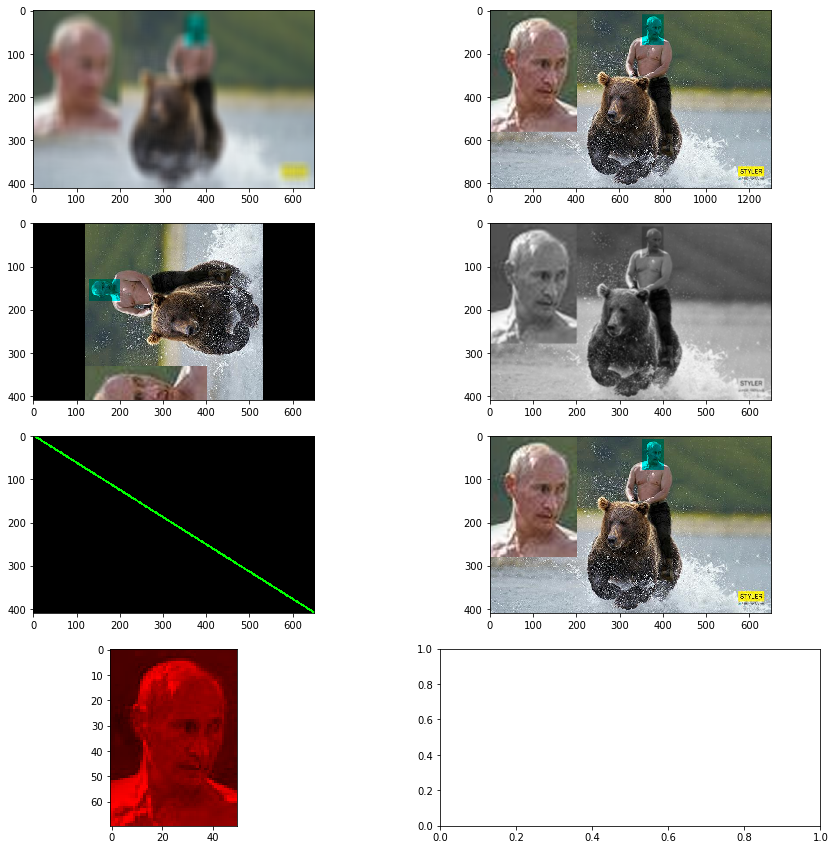

In [23]:
%matplotlib inline


import cv2
import numpy as np
from numpy import uint8
from matplotlib import pyplot as plt

img = np.asarray(bytearray(buf), dtype=uint8)
img = cv2.imdecode(img, cv2.IMREAD_UNCHANGED)[:,:,::-1]
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
r,c,h = img.shape
matrix = cv2.getRotationMatrix2D((c/2,r/2), 90, 1)  

head = img[10:80, 350:400]
_head = np.copy(head)
img[0:70*4, 0:50*4] = cv2.resize(head, None, fx=4., fy=4., interpolation=cv2.INTER_CUBIC)
head[:,:,0] = 0


f, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(15,15))

ax1.imshow(cv2.blur(img, (20,30)))
ax2.imshow(cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC))
ax3.imshow(cv2.warpAffine(img, matrix, (c,r)))
ax4.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), cmap='gray', interpolation='bicubic')
ax5.imshow(cv2.line(np.zeros((r,c,h), uint8),(0,0), (c-1, r-1), (0,255,0), 3))
ax6.imshow(img)

_head[:,:,1:3] = 0
ax7.imshow(_head)

plt.show()

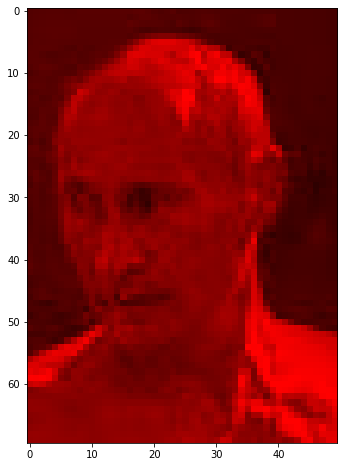

In [24]:
f, ax0 = plt.subplots(1, 1, figsize=(8,8))
ax0.imshow(cv2.flip(_head, 1))
plt.show()

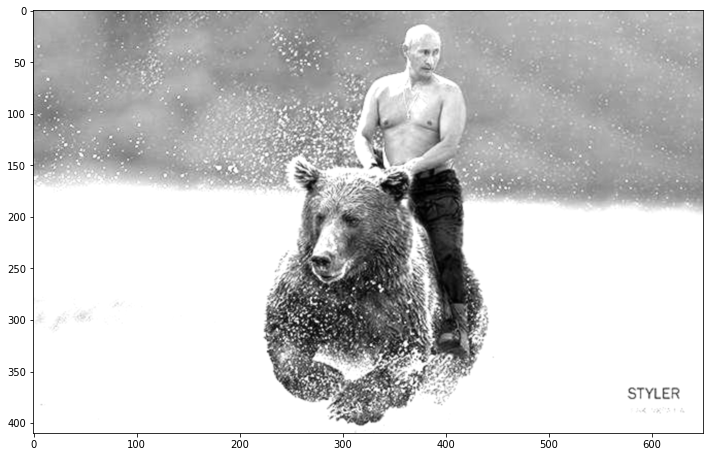

In [25]:
img = np.asarray(bytearray(buf), dtype=uint8)
img = cv2.imdecode(img, cv2.IMREAD_UNCHANGED)[:,:,::-1]
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

_, mask = cv2.threshold(img, 255, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
img = cv2.add(img, cv2.bitwise_and(img, img, mask=mask_inv))

f, ax0 = plt.subplots(1, 1, figsize=(12,12))
ax0.imshow(img, cmap='gray', interpolation='bicubic')
plt.show()